In [1]:
import tweepy
import os
from dotenv import load_dotenv
#activamos el entorno para poder conectar el jupyter y extraer las variables
load_dotenv()
import pandas as pd
import re
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
API_KEY = os.getenv("API_KEY")
API_SECRET = os.getenv("API_SECRET")
ACCESS_TOKEN = os.getenv("ACCESS_TOKEN")
ACCESS_TOKEN_SECRET = os.getenv("ACCESS_TOKEN_SECRET")

In [3]:
auth = tweepy.OAuthHandler(API_KEY, API_SECRET) #Esta es la forma de autenticarnos mediante tweepy
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET) 
api = tweepy.API(auth)

In [4]:
api.__dict__

{'auth': <tweepy.auth.OAuthHandler at 0x7fdc65c6ab50>,
 'host': 'api.twitter.com',
 'search_host': 'search.twitter.com',
 'upload_host': 'upload.twitter.com',
 'api_root': '/1.1',
 'search_root': '',
 'upload_root': '/1.1',
 'cache': None,
 'compression': False,
 'retry_count': 0,
 'retry_delay': 0,
 'retry_errors': None,
 'timeout': 60,
 'wait_on_rate_limit': False,
 'wait_on_rate_limit_notify': False,
 'parser': <tweepy.parsers.ModelParser at 0x7fdc65c6a370>,
 'proxy': {}}

In [5]:
!pip install "requests[security]"

In [6]:
df = pd.DataFrame(columns=["Date","User","IsVerified","Tweet","Likes","RT",'User_location'])
print(df)

Empty DataFrame
Columns: [Date, User, IsVerified, Tweet, Likes, RT, User_location]
Index: []


In [ ]:
Topic=["covid"]
a = tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items()
for i in a:
    print(i._json)

In [7]:
## **tweepy.cursor()** because we want to extract a larger number of tweets
def get_tweets(Topic,Count):    
    i=0
    for tweet in tweepy.Cursor(api.search, q=Topic,count=100, lang="en",exclude='retweets').items():
        df.loc[i,"Date"] = tweet.created_at
        df.loc[i,"User"] = tweet.user.name
        df.loc[i,"IsVerified"] = tweet.user.verified
        df.loc[i,"Tweet"] = tweet.text
        df.loc[i,"Likes"] = tweet.favorite_count
        df.loc[i,"RT"] = tweet.retweet_count
        df.loc[i,"User_location"] = tweet.user.location
        #df.to_csv("TweetDataset.csv",index=False)
        df.to_csv('{}.xlsx'.format("TweetDataset"),index=False)  
        i=i+1
        if i>Count:
            break
        else:
            pass

In [8]:
Topic=["covid"]
get_tweets(Topic , Count=100)

In [9]:
df

,Date,User,IsVerified,Tweet,Likes,RT,User_location
0,2021-06-07 16:35:14,colleen,False,@JAIISAMS man like i worked from home last yea...,0,0,
1,2021-06-07 16:35:13,Cerco Response,False,The number of young people out of work has rea...,0,0,
2,2021-06-07 16:35:13,Naveen Kapoor ANI,True,This is an achievement of US admin .. getting ...,0,0,"New Delhi, India"
3,2021-06-07 16:35:13,Nurul 🐥🌅,False,Thank you buat spaceeeee aaa rindu nk kumpul s...,0,0,Malaysia
4,2021-06-07 16:35:12,Thailand epilepsy,False,COVID 19 Vaccination and Epilepsy SD 480p ht...,0,0,"Epilepsy, BANGKOK, THAILAND"
...,...,...,...,...,...,...,...
96,2021-06-07 16:34:47,Prabha 🇨🇮💐🌻,False,We can only #tweet or #Retweet or #comment upo...,0,0,"New Delhi, India"
97,2021-06-07 16:34:47,Dahlia Wakeman,False,@jamft Are you comparing the 215 children’s bo...,0,0,
98,2021-06-07 16:34:46,Rajeev Godara,False,Supreme Court said and how the Prime Minister ...,0,0,"Chandigarh, India"
99,2021-06-07 16:34:46,ILee WINS,False,BREAKING: @NYGovCuomo to lift remaining COVID ...,0,0,


## Analysis of the tweets

 Function to Clean the Tweet.

In [10]:
def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|([RT])', ' ', str(tweet).lower()).split())

# We only want the Text so :

# (@[A-Za-z0-9]+)   : Delete Anything like @hello @Letsupgrade etc
# ([^0-9A-Za-z \t]) : Delete everything other than text,number,space,tabspace
# (\w+:\/\/\S+)     : Delete https://
# ([RT]) : Remove "RT" from the tweet

In [54]:
clean_tweet("Shipping Disruptions- Why to order early\n\nCovid has caused some shipping disruptions around the world.")

'shipping disruptions why to order early covid has caused some shipping disruptions around the world'

Function to Analyze the Tweet.

In [11]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [12]:
df["Tweet"] = df.Tweet.apply(clean_tweet)

In [13]:
df["Sentiment"] = df.Tweet.apply(analyze_sentiment)

In [14]:
df

,Date,User,IsVerified,Tweet,Likes,RT,User_location,Sentiment
0,2021-06-07 16:35:14,colleen,False,man like i worked from home last year before m...,0,0,,Positive
1,2021-06-07 16:35:13,Cerco Response,False,the number of young people out of work has rea...,0,0,,Positive
2,2021-06-07 16:35:13,Naveen Kapoor ANI,True,this is an achievement of us admin getting rid...,0,0,"New Delhi, India",Neutral
3,2021-06-07 16:35:13,Nurul 🐥🌅,False,thank you buat spaceeeee aaa rindu nk kumpul s...,0,0,Malaysia,Neutral
4,2021-06-07 16:35:12,Thailand epilepsy,False,covid 19 vaccination and epilepsy sd 480p via,0,0,"Epilepsy, BANGKOK, THAILAND",Neutral
...,...,...,...,...,...,...,...,...
96,2021-06-07 16:34:47,Prabha 🇨🇮💐🌻,False,we can only tweet or retweet or comment upon b...,0,0,"New Delhi, India",Positive
97,2021-06-07 16:34:47,Dahlia Wakeman,False,are you comparing the 215 children s bodies fo...,0,0,,Neutral
98,2021-06-07 16:34:46,Rajeev Godara,False,supreme court said and how the prime minister ...,0,0,"Chandigarh, India",Positive
99,2021-06-07 16:34:46,ILee WINS,False,breaking to lift remaining covid rules once 70...,0,0,,Negative


In [15]:
print("Total Tweets Extracted for Topic : {} are : {}".format(Topic,len(df.Tweet)))
print("Total Positive Tweets are : {}".format(len(df[df["Sentiment"]=="Positive"])))
print("Total Negative Tweets are : {}".format(len(df[df["Sentiment"]=="Negative"])))
print("Total Neutral Tweets are : {}".format(len(df[df["Sentiment"]=="Neutral"])))

Total Tweets Extracted for Topic : ['covid'] are : 101
Total Positive Tweets are : 44
Total Negative Tweets are : 12
Total Neutral Tweets are : 45


In [69]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Carmenrodriguez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
def wordcloud_tweet(tweets):
    """
    Most-tweeted words in texts containing the covid-19 vaccine seeing with word cloud
    Args:
        tweets: the text that is going to be stop
    """
    stopwords = set(STOPWORDS)
    stopwords.update(["covid", "covid19", "vaccines", "vaccine", "will", "coronavirus", "next", "yes", "s", "t", "still"])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white",stopwords=stopwords, random_state = 2016).generate(" ".join([i for i in tweets['Tweet'].str.upper()]))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")

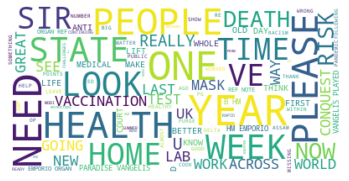

In [17]:
wordcloud_tweet(df)